In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import load_breast_cancer

In [89]:
class KernelLogisticRegression:

    def __init__(self, kernel, gamma, degree):
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        
    def rbf(self, X1, X2):
        return np.exp(-self.gamma * np.sum((X2 - X1[:,np.newaxis])**2, axis = -1))
    
    def poly(self, X1, X2, k=0.5):
        # TODO: Need to add a constant term as well...
        return (np.matmul(X1, np.transpose(X2))+k)**self.degree
    
    def linear(self, X):
        return X
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def compute_gradients(self, X_train, Y_train, Y_cap):
        dw = np.dot(X_train.T, (Y_cap - Y_train)) / Y_train.shape[0]
        db = np.sum((Y_cap - Y_train)) / Y_train.shape[0]
        return  dw, db

    def train(self, X, Y, n_iter, alpha):
        
        self.x_start = X.copy()
        
        if self.kernel == "rbf":
            X = self.rbf(X, X)
        elif self.kernel == "poly":
            X = self.poly(X, X)
        elif self.kernel == "linear":
            X = self.linear(X)
        else:
            print("Unexpected kernel type...")
        
        W = np.zeros(X.shape[1])
        b = 0
        for i in range(n_iter):
            y_cap = self.sigmoid(np.dot(X, W) + b)
            dw, db = self.compute_gradients(X, Y, y_cap)
            W = W - alpha * dw
            b = b - alpha * db
        self.W = W
        self.b = b
        return

    def predict(self, X):
        if self.kernel == "rbf":
            X = self.rbf(X, self.x_start)
        elif self.kernel == "poly":
            X = self.poly(X, self.x_start)
        elif self.kernel == "linear":
            X = self.linear(X)
        else:
            print("Unexpected kernel type...")
        
        y_cap = self.sigmoid(np.dot(X, self.W) + self.b)
        y_pred = [1 if i > 0.5 else 0 for i in y_cap]
        return np.array(y_pred)
    
    def evaluate(self, X, Y):
        y_pred = self.predict(X)
        acc = len(np.where(y_pred == Y)[0]) / len(Y)
        return acc

In [90]:
def decision_boundary(model, X, Y):
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.arange(X1_min, X1_max, 0.02), np.arange(X2_min, X2_max, 0.02))

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[np.where(Y==0)[0], 0], X[np.where(Y==0)[0], 1], label='0')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    plt.contour(XX, YY, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()

In [91]:
# Q. 3.3

In [232]:
X, Y = make_circles(1500)

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [234]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [95]:
klr = KernelLogisticRegression(kernel="rbf", gamma=5, degree=None)
klr.train(X_train, Y_train, n_iter=100, alpha=0.1)

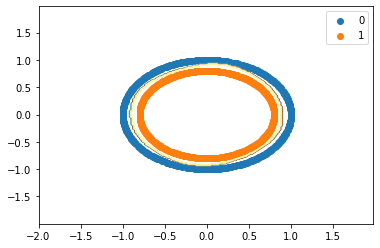

In [96]:
decision_boundary(klr, X_train, Y_train)

In [97]:
# Kernel Logistic Regression
# Kernel = "RBF", gamma = 5, lr = 0.1, epochs = 100
# Accuracy = 100%
klr.evaluate(X_test, Y_test)

1.0

In [229]:
klr = KernelLogisticRegression(kernel="poly", gamma=None, degree=2)
klr.train(X_train, Y_train, n_iter=1000, alpha=0.01)

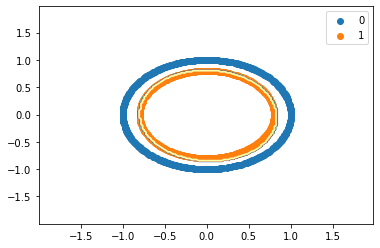

In [230]:
decision_boundary(klr, X_train, Y_train)

In [231]:
# Kernel Logistic Regression
# Kernel = "Polynomial", degree=3, lr = 0.01, epochs = 2000
# Accuracy = 100%
klr.evaluate(X_test, Y_test)

1.0

In [146]:
# Q. 3.4

In [255]:
X, Y = load_breast_cancer(return_X_y=True)

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=500, random_state=2)

In [257]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=50, random_state=2)

In [188]:
klr = KernelLogisticRegression(kernel="rbf", gamma=4, degree=None)
klr.train(X_train, Y_train, n_iter=300, alpha=0.001)

In [189]:
# Logistic Regression - RBF kernel - on breast cancer dataset
# epochs = 300, alpha = 0.001, gamma = 4
# Accuracy = 63%
klr.evaluate(X_test, Y_test)

0.63

In [262]:
klr = KernelLogisticRegression(kernel="poly", gamma=None, degree=2)
klr.train(X_train, Y_train, n_iter=100, alpha=0.002)

/var/folders/v0/g401c4x979d___jdl5ddw2_r0000gn/T/ipykernel_5953/1288338910.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


In [264]:
# Logistic Regression - Poly kernel - on breast cancer dataset
# epochs = 100, alpha = 0.002, degree = 2
# Accuracy = 60.2%
klr.evaluate(X_test, Y_test)

0.602